# CRISP-DM on Seattle Airbnb Data

As we know that the CRISP-DM process involves the below 6 steps to solve a data science problem:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment


So,in this jupyter notebook,we will applying CRISP-DM on seattle's Airbnb Data

## Business Understanding

A‌i‌r‌b‌n‌b‌,‌ ‌I‌n‌c‌.‌ operates a global online marketplace and hospitality service accessible via its websites and mobile apps. Members can use the service to arrange or offer lodging, primarily home stays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from every booking.

Since,this company recieves commission for each transactions that is carried on between the customers and the host.So,if the company has to increse its revenue,it has to increase the number of bookings for the listings on their marketplace.Now, the number of bookings will depend on two main KPIs
- Price
- Review ratings

Taking these two main KPIs into consideration,I decided to answer the below mentioned three questions
- How does the price of Seattle Airbnb listing vary throughout the year?When are the prices the highest and where are they lowest?
- Which neighborhoods have got the best average ratings from the reviewers?What are the most important factors influencing the ratings of an Airbnb listing?
- What are the most important factors influencing the price of an Airbnb listing?

## Data Understanding

The dataset for this analysis consists of three files:
- calendar: including listing id,the price and availability of a listing on a given day
- listings:including full listing descriptions and their review scores
- reviews:including the id of each reviewers and their comments

## Data Preparation

Now,we will analyze and prepare our input data in following cells

In [3]:
#Import statements here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [4]:
#Reading all the file here
listings=pd.read_csv(r"C:\Users\HP\Desktop\Udacity_Nanodegree\Data Science Blog Post\listings.csv")
calender_seattle=pd.read_csv(r"C:\Users\HP\Desktop\Udacity_Nanodegree\Data Science Blog Post\calendar.csv")
reviews=pd.read_csv(r"C:\Users\HP\Desktop\Udacity_Nanodegree\Data Science Blog Post\reviews.csv")

In [5]:
#Analysing calendar dataset
#Let us see first few rows of calendar dataset
calender_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
#Let us see the number of missing columns in the dataset
calender_seattle.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
#Let us see the % missing values in each column
calender_seattle.isnull().sum()/calender_seattle.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [8]:
#Analysing listings  dataset
#Let us see first few rows of listings dataset
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
#Let us see the % missing values in each column
listings.isnull().sum()/listings.shape[0]

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_id                             0.000000
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_respo

In [10]:
#Lets see the number of rows and columns in the listings dataset
listings.shape

(3818, 92)

In [11]:
#Let us also analyze the ratings column of the listings dataset
listings['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,3171.000000
1,mean,94.539262
2,std,6.606083
3,min,20.000000
4,25%,93.000000
5,50%,96.000000
6,75%,99.000000
7,max,100.000000


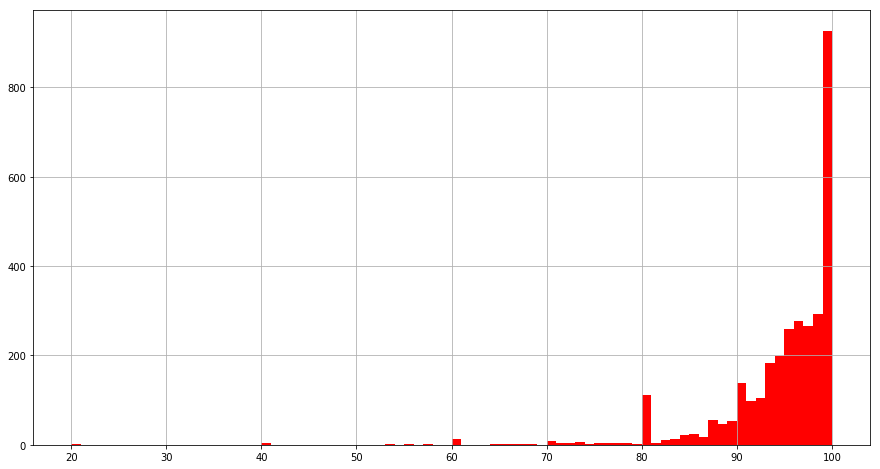

In [12]:
# plot histgram to see the distribution of this column
plt.figure(figsize=(15, 8))
plt.hist(listings['review_scores_rating'].dropna().values, bins=80, color='r')
plt.grid()

So,the ratings column is left skewed with maximum number of listings have ratings more than 90

In [13]:
#Now,let us analyse our 3rd dataset of reviews
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [14]:
#Let us see the number of missing values in the every column of the reviews dataset
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         17
dtype: int64

In [15]:
#Let us see the % missing values in each column
reviews.isnull().sum()/reviews.shape[0]

listing_id       0.0000
id               0.0000
date             0.0000
reviewer_id      0.0000
reviewer_name    0.0000
comments         0.0002
dtype: float64

In [16]:
#Let us see the number of rows and columns in the reviews dataset
reviews.shape

(84849, 6)

In [17]:
#Cleaning the calender dataset
def transform(df):
    df.dropna(inplace=True)
    df['date']=pd.to_datetime(df['date'])#Also,converting the date column from object to datetime
    df['price']=df['price'].str.replace('$','')#Removing the $ sign from the price column
    df['price']=df['price'].str.replace(',','')#Also removing the commas from the price
    df['price']=df['price'].astype(float)#Converting the price from object to float
    return df

In [18]:
#Transforming the calender_seattle data using the transform function
transform(calender_seattle)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
15,241032,2016-01-19,t,85.0
16,241032,2016-01-20,t,85.0
20,241032,2016-01-24,t,85.0
21,241032,2016-01-25,t,85.0
22,241032,2016-01-26,t,85.0


##  Q1 How does the price of Seattle Airbnb listing vary throughout the year?

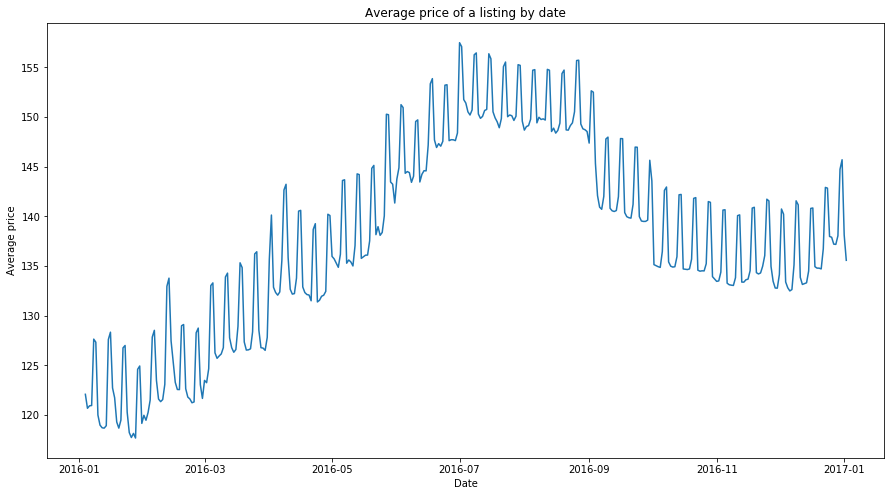

In [19]:
#For analysing this,let us aggregate the price based on the date
calender_seattle=calender_seattle.groupby('date')['price'].mean().reset_index()

#Then Let us plot a line chart to see how the price vary over a period of time
plt.figure(figsize=(15,8))
plt.plot(calender_seattle['date'],calender_seattle['price'])
plt.title('Average price of a listing by date')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.show()

From the above visualisation,we figured out that the prices of the listings were maximum from July to September and were minimum from January to March

How does the price vary throughout the week?

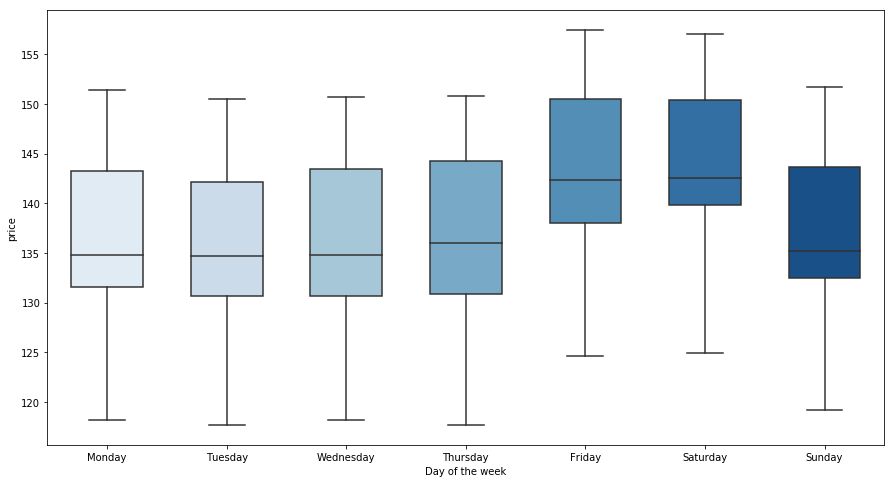

In [20]:
#For the same,let us try to take out the weekday name from the date and then plot the price wrt the weekday
calender_seattle['Day of the week']=calender_seattle['date'].dt.weekday_name
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Day of the week',  y = 'price', data = calender_seattle, palette="Blues", width=0.6)
plt.show()

So,we can see that the price for the listing is highest on Fridays and Saturdays.Therefore,we can conclude that the weekends have higher price for the listings when compared to the weekdays.

Let us also clean the listings dataframe as well.
Choosing which columns to take from the 92 columns that we have in our dataset: ---'host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy'

In [21]:
#Also applying the neccessary transformations using a function:
def clean_ratings(df):
    
    df=df.copy()
    df=df.loc[:,['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']]
    #Lets remove the % sign from the host_response_rate and host_acceptance_rate columns
    df['host_response_rate']=df['host_response_rate'].str.replace('%','')
    df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('%','')
    #Converting host_response_rate and host_acceptance rate to float type
    df['host_response_rate']=df['host_response_rate'].astype('float64')/100
    df['host_acceptance_rate']=df['host_acceptance_rate'].astype('float64')/100
    #Filling the missing values with 0
    df['host_response_rate'].fillna(0,inplace=True)
    df['host_acceptance_rate'].fillna(0,inplace=True)
    #Converting the columns with binomial values 
    #Let us  replace f with 0 and t with 1 in host_is_superhost column
    df['host_is_superhost']=df['host_is_superhost'].str.replace('f','0')
    df['host_is_superhost']=df['host_is_superhost'].str.replace('t','1')
    df['instant_bookable']=df['instant_bookable'].str.replace('f','0')
    df['instant_bookable']=df['instant_bookable'].str.replace('t','1')
    #Converting these two coumns as well to float and converting it from percentage to number
    df['host_is_superhost']=df['host_is_superhost'].astype('float64')
    df['instant_bookable']=df['instant_bookable'].astype('float64')
    #Filling the missing values with 0
    df['host_is_superhost'].fillna(0,inplace=True)
    df['instant_bookable'].fillna(0,inplace=True)
    #We can see that these all columns are strings and have $ sign.We need to remove the $ sign and convert the type to float
    df['price']=df['price'].str.replace('$','')
    df['weekly_price']=df['weekly_price'].str.replace('$','')
    df['monthly_price']=df['monthly_price'].str.replace('$','')
    df['security_deposit']=df['security_deposit'].str.replace('$','')
    df['cleaning_fee']=df['cleaning_fee'].str.replace('$','')
    df['extra_people']=df['extra_people'].str.replace('$','')
    #Also,removing the commas as well
    df['price']=df['price'].str.replace(',','')
    df['weekly_price']=df['weekly_price'].str.replace(',','')
    df['monthly_price']=df['monthly_price'].str.replace(',','')
    df['security_deposit']=df['security_deposit'].str.replace(',','')
    df['cleaning_fee']=df['cleaning_fee'].str.replace(',','')
    df['extra_people']=df['extra_people'].str.replace(',','')
    #Converting to float64
    df['price']=df['price'].astype('float64')
    df['weekly_price']=df['weekly_price'].astype('float64')
    df['monthly_price']=df['monthly_price'].astype('float64')
    df['security_deposit']=df['security_deposit'].astype('float64')
    df['cleaning_fee']=df['cleaning_fee'].astype('float64')
    df['extra_people']=df['extra_people'].astype('float64')
    #Replacing the missing values with 0
    df['price'].fillna(0,inplace=True)
    df['weekly_price'].fillna(0,inplace=True)
    df['monthly_price'].fillna(0,inplace=True)
    df['security_deposit'].fillna(0,inplace=True)
    df['cleaning_fee'].fillna(0,inplace=True)
    df['extra_people'].fillna(0,inplace=True)
    #Let us clean  the ameneties column
    df['amenities']=df['amenities'].str.replace("{","")
    df['amenities']=df['amenities'].str.replace("}","")
    df['amenities']=df['amenities'].str.replace(" ","")
    df['amenities']=df['amenities'].str.replace('"','')
    df['amenities']=df['amenities'].str.replace(",","  ")
    df['amenities']
    df['amenities_length']=df['amenities'].str.len()
    df=df.drop(['amenities'],axis=1)
    #Converting these categories to integer values
    df['host_response_time'].replace('within an hour',1, inplace=True)
    df['host_response_time'].replace('within a few hours',2,inplace=True)
    df['host_response_time'].replace('within a day',3,inplace=True)
    df['host_response_time'].replace('a few days or more',4,inplace=True)
    #Filling the missing values of this column as well
    df['host_response_time'].fillna(method='ffill',inplace=True)
    #Let us also treat missing values of some other columns
    df['beds'].fillna(method='ffill',inplace=True)
    df['bathrooms'].fillna(method='ffill',inplace=True)
    df['bedrooms'].fillna(method='ffill',inplace=True)
    return df

In [23]:
#Cleaning the listings dataframe using this function
listings_ratings=clean_ratings(listings)

Now, we have a cleaned dataframe.There are only two categorical columns that are to be taken care of:
- property type
- bed type..........Let us do that now !!!!!

In [24]:
#Let us see the number of unique values in the column property_type
listings_ratings['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast', 'Other',
       'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan], dtype=object)

In [25]:
#Now,here we have a lot of values,let us try to recode them into 6 categories
#Apartment,House,Cabin,Condominium,Bungalow and Townhouse
def assign(val):
    if val not in ['House','Apartment','Cabin','Condominium','Bungalow','Townhouse']:
        return 'Other'
    return val

listings_ratings['property_type']=listings_ratings['property_type'].apply(assign)

In [26]:
#Let us  also recode the bed_type column as well and put them in two categories:bed and other
def assign1(val):
    if val not in ['Real Bed']:
        return 'Other'
    return val


listings_ratings['bed_type']=listings_ratings['bed_type'].apply(assign1)

In [27]:
#Let us see the info of our cleaned listings dataset
listings_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 31 columns):
host_response_time             3818 non-null float64
host_response_rate             3818 non-null float64
host_acceptance_rate           3818 non-null float64
host_is_superhost              3818 non-null float64
neighbourhood_cleansed         3818 non-null object
property_type                  3818 non-null object
room_type                      3818 non-null object
accommodates                   3818 non-null int64
bathrooms                      3818 non-null float64
bedrooms                       3818 non-null float64
beds                           3818 non-null float64
bed_type                       3818 non-null object
price                          3818 non-null float64
weekly_price                   3818 non-null float64
monthly_price                  3818 non-null float64
security_deposit               3818 non-null float64
cleaning_fee                   3818 non-null float6

## Q2 Which neighborhoods have got the best average ratings from the reviewers?What are the most important factors influencing the ratings of an Airbnb listing?

In [28]:
#Let us try to plot the review score rating with respect to the neighbourhood
listings_subset=listings_ratings.loc[:,['neighbourhood_cleansed','review_scores_rating']]
listings_grouped=listings_subset.groupby('neighbourhood_cleansed',as_index=False).mean().sort_values(by=['review_scores_rating'],ascending=False)
listings_top_ten=listings_grouped.nlargest(10,['review_scores_rating'])
listings_top_ten

,neighbourhood_cleansed,review_scores_rating
2,Arbor Heights,98.000000
64,Riverview,97.250000
73,Southeast Magnolia,97.214286
41,Madrona,97.100000
28,Harrison/Denny-Blaine,97.083333
23,Genesee,96.933333
51,North Beach/Blue Ridge,96.909091
35,Laurelhurst,96.777778
84,Whittier Heights,96.666667
54,North Delridge,96.600000


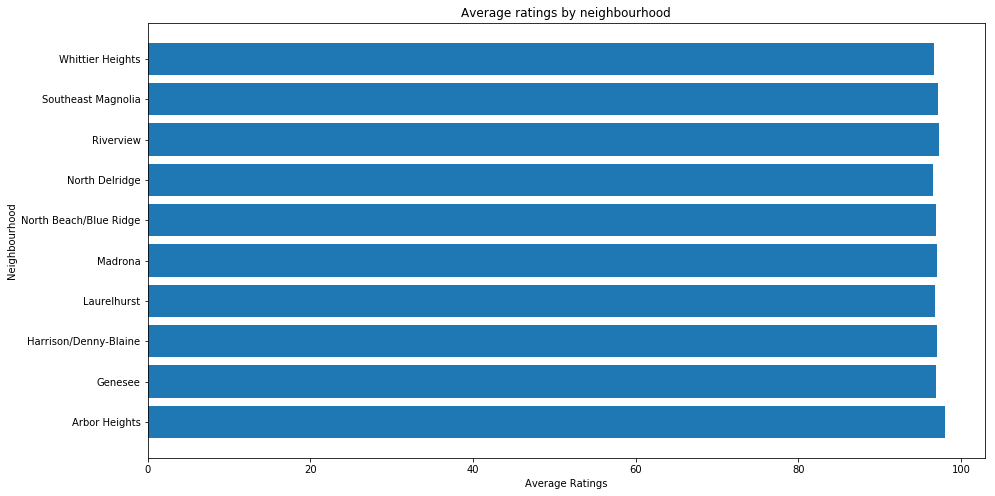

In [29]:
plt.figure(figsize=(15,8))
plt.barh(listings_top_ten['neighbourhood_cleansed'],listings_top_ten['review_scores_rating'])
plt.title('Average ratings by neighbourhood')
plt.xlabel('Average Ratings')
plt.ylabel('Neighbourhood')
plt.show()

From the above visualisation,it is clear that the average rating score of Arbor Heights is maximum followed by Riverview and Southeast Magnolia.....Let us start cleaning the data for modelling our rating as response variable.Now let us remove all the rows from the dataframe where we do not have our respose variable review_score_rating.

In [30]:
listings_ratings=listings_ratings[listings_ratings['review_scores_rating'].isnull()==0]

In [31]:
#Let us take all the numerical columns and see the correlation between them
col=['int64','float64']
listings_ratings_numeric=listings_ratings.select_dtypes(include=col)

In [32]:
listings_ratings_numeric.corr()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1.000000,-0.200426,-0.123862,-0.155169,0.053870,0.028025,0.080800,0.028820,0.090766,0.018312,...,-0.005918,-0.097097,-0.065480,-0.109392,-0.064917,-0.081838,-0.052179,-0.099000,-0.256144,-0.141477
host_response_rate,-0.200426,1.000000,0.698217,0.150907,0.013029,-0.013927,-0.058201,0.012870,-0.112239,-0.011232,...,-0.054280,0.049829,0.052837,0.095328,0.026567,0.029193,0.041372,0.055874,0.112930,0.142344
host_acceptance_rate,-0.123862,0.698217,1.000000,0.133112,0.003875,-0.041655,-0.079782,0.001408,-0.151918,-0.055773,...,-0.039556,0.008643,0.010656,0.039106,-0.023370,-0.030261,0.025658,0.028775,0.101765,0.124922
host_is_superhost,-0.155169,0.150907,0.133112,1.000000,-0.026338,-0.018085,-0.041232,-0.040794,0.005096,0.051218,...,-0.032452,0.240895,0.215256,0.230263,0.166301,0.162025,0.126054,0.221285,0.071258,0.094293
accommodates,0.053870,0.013029,0.003875,-0.026338,1.000000,0.526793,0.770186,0.861727,0.648382,0.305610,...,0.008894,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,0.028825,0.262140
bathrooms,0.028025,-0.013927,-0.041655,-0.018085,0.526793,1.000000,0.604431,0.527210,0.509525,0.214865,...,-0.012477,0.044645,-0.006297,0.017079,-0.003699,-0.016998,-0.008709,0.014402,-0.046616,0.124997
bedrooms,0.080800,-0.058201,-0.079782,-0.041232,0.770186,0.604431,1.000000,0.752361,0.627782,0.300489,...,-0.005759,0.024235,-0.011550,-0.006658,0.010652,0.001255,-0.028692,-0.000121,-0.063960,0.165126
beds,0.028820,0.012870,0.001408,-0.040794,0.861727,0.527210,0.752361,1.000000,0.584570,0.254771,...,-0.006770,-0.000720,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,0.030608,0.215958
price,0.090766,-0.112239,-0.151918,0.005096,0.648382,0.509525,0.627782,0.584570,1.000000,0.411623,...,-0.002336,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776,-0.022769,0.171919
weekly_price,0.018312,-0.011232,-0.055773,0.051218,0.305610,0.214865,0.300489,0.254771,0.411623,1.000000,...,0.036644,0.031977,0.015279,0.029985,0.024746,-0.001030,0.020215,-0.022184,-0.001421,0.135732


In [33]:
#Let us plot the correlation 
corr = listings_ratings_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1,-0.200426,-0.123862,-0.155169,0.0538696,0.0280254,0.0807996,0.0288197,0.0907658,0.0183119,-0.0413096,-0.0383826,0.0556475,-0.020861,-0.00411348,0.010998,-0.00591848,-0.0970966,-0.0654797,-0.109392,-0.0649171,-0.0818375,-0.0521786,-0.0989999,-0.256144,-0.141477
host_response_rate,-0.200426,1,0.698217,0.150907,0.0130288,-0.0139266,-0.0582014,0.0128698,-0.112239,-0.0112323,0.0690798,-0.025748,0.00302616,0.0397231,-0.00405323,0.0030868,-0.05428,0.0498285,0.0528372,0.0953275,0.0265665,0.0291934,0.0413724,0.055874,0.11293,0.142344
host_acceptance_rate,-0.123862,0.698217,1,0.133112,0.00387466,-0.041655,-0.0797821,0.00140786,-0.151918,-0.0557732,0.0533202,-0.0319934,-0.0121268,0.00577113,-0.0200695,-0.00418875,-0.0395565,0.00864267,0.0106563,0.039106,-0.0233704,-0.0302609,0.025658,0.0287745,0.101765,0.124922
host_is_superhost,-0.155169,0.150907,0.133112,1,-0.026338,-0.0180851,-0.0412323,-0.0407941,0.00509605,0.0512176,0.0936275,0.0389275,-0.0158697,0.0346338,0.0186675,-0.0068255,-0.0324516,0.240895,0.215256,0.230263,0.166301,0.162025,0.126054,0.221285,0.0712583,0.0942926
accommodates,0.0538696,0.0130288,0.00387466,-0.026338,1,0.526793,0.770186,0.861727,0.648382,0.30561,0.255305,0.314415,0.640941,0.54422,0.142475,0.015401,0.008894,-0.0131008,-0.0496649,0.0116462,-0.0196637,-0.0132079,-0.0375198,-0.0620412,0.0288249,0.26214
bathrooms,0.0280254,-0.0139266,-0.041655,-0.0180851,0.526793,1,0.604431,0.52721,0.509525,0.214865,0.136759,0.225318,0.446521,0.300843,0.066678,0.00288434,-0.0124769,0.0446451,-0.00629735,0.0170791,-0.00369895,-0.0169981,-0.00870876,0.0144023,-0.0466164,0.124997
bedrooms,0.0807996,-0.0582014,-0.0797821,-0.0412323,0.770186,0.604431,1,0.752361,0.627782,0.300489,0.216004,0.304258,0.575839,0.468074,0.101956,0.009775,-0.00575859,0.0242348,-0.0115499,-0.00665816,0.0106523,0.00125508,-0.0286919,-0.000120968,-0.06396,0.165126
beds,0.0288197,0.0128698,0.00140786,-0.0407941,0.861727,0.52721,0.752361,1,0.58457,0.254771,0.204019,0.293065,0.599922,0.476172,0.129696,-0.000820951,-0.00676992,-0.000720366,-0.0527674,0.00473212,-0.0219626,-0.0133733,-0.023734,-0.0291017,0.030608,0.215958
price,0.0907658,-0.112239,-0.151918,0.00509605,0.648382,0.509525,0.627782,0.58457,1,0.411623,0.29255,0.348246,0.590014,0.415353,0.130667,0.0181667,-0.00233605,0.0555512,0.0190256,0.0543571,0.00787708,0.0129897,0.0750685,-0.0417763,-0.0227693,0.171919
weekly_price,0.0183119,-0.0112323,-0.0557732,0.0512176,0.30561,0.214865,0.300489,0.254771,0.411623,1,0.668006,0.305269,0.297512,0.24717,0.132549,0.000383609,0.0366439,0.031977,0.015279,0.0299846,0.0247457,-0.0010299,0.0202155,-0.0221843,-0.00142123,0.135732


In [34]:
#Let us see how the review_scores_rating is correlated to the other columns
corr['review_scores_rating'].sort_values(ascending=False)

review_scores_rating           1.000000
review_scores_value            0.696534
review_scores_cleanliness      0.642882
review_scores_accuracy         0.621257
review_scores_communication    0.540620
review_scores_checkin          0.521813
review_scores_location         0.368423
host_is_superhost              0.240895
amenities_length               0.154185
price                          0.055551
host_response_rate             0.049829
bathrooms                      0.044645
weekly_price                   0.031977
bedrooms                       0.024235
security_deposit               0.023587
host_acceptance_rate           0.008643
instant_bookable               0.006071
minimum_nights                 0.001392
beds                          -0.000720
guests_included               -0.001430
cleaning_fee                  -0.004638
monthly_price                 -0.008351
accommodates                  -0.013101
maximum_nights                -0.031313
extra_people                  -0.035063


From the above we can say that the rating subscore is related to the overall rating..That is logical as they are a part of the overall rating score.The other feature that are highly correlated to the rating are:
- host_is_superhost
-  amenities_length 
- price
- host_response rate

In [35]:
#Encoding the categorical features  into dummy variables
listings_ratings=pd.get_dummies(listings_ratings,columns=['cancellation_policy','room_type','property_type','bed_type','neighbourhood_cleansed'])

In [36]:
#Also,since we are taking the review_scores_rating as our target column,we will be dropping other subscores such as rating,accuracy etc
listings_ratings=listings_ratings.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],axis=1)

## Modelling,Evaluation & Deployment

In [37]:
#Now let us start modelling the data
Y=listings_ratings['review_scores_rating']
X=listings_ratings.drop(['review_scores_rating'],axis=1)

In [38]:
#Now,let us split ou data into train test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=243)

In [39]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
coefficients=pd.DataFrame({'features':X.columns,'importance':lm.coef_})
coefficients.sort_values('importance',ascending=False)[:10]

,features,importance
3,host_is_superhost,3.388936
1,host_response_rate,0.974509
6,bedrooms,0.076351
7,beds,0.025235
18,amenities_length,0.015225
8,price,0.006632
15,minimum_nights,0.002299
11,security_deposit,0.000706
9,weekly_price,0.000410
12,cleaning_fee,-0.000058


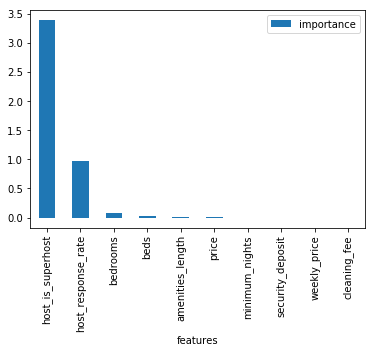

In [41]:
#Plotting a bar graph for the important features
plt.figure(figsize=(15,8))
coefficients.sort_values(by='importance',ascending=False)[:10].plot(x='features', y='importance', kind='bar')

In [42]:
#Getting the error on the test dataset to see how linear regression is performing on this dataset
Y_predict = lm.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

6.1015319766858225

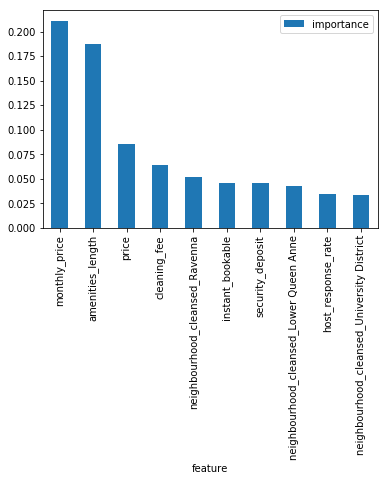

In [43]:
#Let us apply Decision Tree
#Make the decision tree
decisiontree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
decisiontree = decisiontree.fit(X_train,Y_train)

#Look at outputs
importances = decisiontree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [44]:
#Let us test our decision tree regressor to see how it performs on our test dataset
Y_predict = decisiontree.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

18.388801796094899

As we can see that the error for linear reegression is less than that of decision tree regressor,we will take the important 
features of linear regression as the ones that determine the rating of a listing.Hence,the most important features are:
- host_is_superhost
- host_response_rate
- Number of beds and bedrooms in a listing
- Number of amenities being provided by the listing 

# Q3 What are the most important factors influencing the price of an Airbnb listing?

Now,since price is our response varaible and not ratings,we will create a new function to clean the listings dataset so that we can do modelling to figure out the important factors influencing the price of a listing

In [45]:
#Let us define our cleaning function once again
def clean_price(df):
    df=df.copy()
    df=df.loc[:,['host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']]
    #Lets remove the % sign from the host_response_rate and host_acceptance_rate columns
    df['host_response_rate']=df['host_response_rate'].str.replace('%','')
    df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('%','')
    #Converting host_response_rate and host_acceptance rate to float type
    df['host_response_rate']=df['host_response_rate'].astype('float64')/100
    df['host_acceptance_rate']=df['host_acceptance_rate'].astype('float64')/100
    #Filling the missing values with 0
    df['host_response_rate'].fillna(0,inplace=True)
    df['host_acceptance_rate'].fillna(0,inplace=True)
    #Converting the columns with binomial values 
    #Let us  replace f with 0 and t with 1 in host_is_superhost column
    df['host_is_superhost']=df['host_is_superhost'].str.replace('f','0')
    df['host_is_superhost']=df['host_is_superhost'].str.replace('t','1')
    df['instant_bookable']=df['instant_bookable'].str.replace('f','0')
    df['instant_bookable']=df['instant_bookable'].str.replace('t','1')
    #Converting these two coumns as well to float and converting it from percentage to number
    df['host_is_superhost']=df['host_is_superhost'].astype('float64')
    df['instant_bookable']=df['instant_bookable'].astype('float64')
    #Filling the missing values with 0
    df['host_is_superhost'].fillna(0,inplace=True)
    df['instant_bookable'].fillna(0,inplace=True)
    #We can see that these all columns are strings and have $ sign.We need to remove the $ sign and convert the type to float
    df['price']=df['price'].str.replace('$','')
    df['weekly_price']=df['weekly_price'].str.replace('$','')
    df['monthly_price']=df['monthly_price'].str.replace('$','')
    df['security_deposit']=df['security_deposit'].str.replace('$','')
    df['cleaning_fee']=df['cleaning_fee'].str.replace('$','')
    df['extra_people']=df['extra_people'].str.replace('$','')
    #Also,removing the commas as well
    df['price']=df['price'].str.replace(',','')
    df['weekly_price']=df['weekly_price'].str.replace(',','')
    df['monthly_price']=df['monthly_price'].str.replace(',','')
    df['security_deposit']=df['security_deposit'].str.replace(',','')
    df['cleaning_fee']=df['cleaning_fee'].str.replace(',','')
    df['extra_people']=df['extra_people'].str.replace(',','')
    #Converting to float64
    df['price']=df['price'].astype('float64')
    df['weekly_price']=df['weekly_price'].astype('float64')
    df['monthly_price']=df['monthly_price'].astype('float64')
    df['security_deposit']=df['security_deposit'].astype('float64')
    df['cleaning_fee']=df['cleaning_fee'].astype('float64')
    df['extra_people']=df['extra_people'].astype('float64')
    #Replacing the missing values with 0
    df['weekly_price'].fillna(0,inplace=True)
    df['monthly_price'].fillna(0,inplace=True)
    df['security_deposit'].fillna(0,inplace=True)
    df['cleaning_fee'].fillna(0,inplace=True)
    df['extra_people'].fillna(0,inplace=True)
    df['review_scores_accuracy'].fillna(0,inplace=True)
    df['review_scores_cleanliness'].fillna(0,inplace=True)
    df['review_scores_checkin'].fillna(0,inplace=True)
    df['review_scores_communication'].fillna(0,inplace=True)
    df['review_scores_location'].fillna(0,inplace=True)
    df['review_scores_value'].fillna(0,inplace=True)
    df['review_scores_rating'].fillna(0,inplace=True)
    #Let us clean  the ameneties column
    df['amenities']=df['amenities'].str.replace("{","")
    df['amenities']=df['amenities'].str.replace("}","")
    df['amenities']=df['amenities'].str.replace(" ","")
    df['amenities']=df['amenities'].str.replace('"','')
    df['amenities']=df['amenities'].str.replace(",","  ")
    df['amenities']
    df['amenities_length']=df['amenities'].str.len()
    df=df.drop(['amenities'],axis=1)
    #Converting these categories to integer values
    df['host_response_time'].replace('within an hour',1, inplace=True)
    df['host_response_time'].replace('within a few hours',2,inplace=True)
    df['host_response_time'].replace('within a day',3,inplace=True)
    df['host_response_time'].replace('a few days or more',4,inplace=True)
    #Filling the missing values of this column as well
    df['host_response_time'].fillna(method='ffill',inplace=True)
    #Let us also treat missing values of some other columns
    df['beds'].fillna(method='ffill',inplace=True)
    df['bathrooms'].fillna(method='ffill',inplace=True)
    df['bedrooms'].fillna(method='ffill',inplace=True)
    return df

In [46]:
#Cleaning the listings datset using this cleaning function
listings_price=clean_price(listings)

In [47]:
#Cleaning few categorical variables as well
#Now,here we have a lot of values,let us try to recode them into 6 categories
#Apartment,House,Cabin,Condominium,Bungalow and Townhouse
def recode(val):
    if val not in ['House','Apartment','Cabin','Condominium','Bungalow','Townhouse']:
        return 'Other'
    return val

listings_price['property_type']=listings_price['property_type'].apply(recode)

In [48]:
#Let us recode the bed_type column as well and put them in two categories:bed and other
def recode1(val):
    if val not in ['Real Bed']:
        return 'Other'
    return val


listings_price['bed_type']=listings_price['bed_type'].apply(recode1)

In [49]:
#Now let us remove all the rows from the dataframe where we do not have our respose variable price
listings_price=listings_price[listings_price['price'].isnull()==0]

In [50]:
#Let us take all the numerical coulmns and see the correlation between them
col=['int64','float64']
listings_price_numeric=listings_price .select_dtypes(include=col)

In [51]:
#Let us see how these columns are correlated to each other
listings_price_numeric.corr()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1.000000,-0.167917,-0.111110,-0.161036,0.046813,0.023332,0.071498,0.031624,0.069188,-0.000832,...,-0.001338,-0.106766,-0.101890,-0.111378,-0.100650,-0.102768,-0.099608,-0.107789,-0.242631,-0.121530
host_response_rate,-0.167917,1.000000,0.723693,0.179314,0.047155,0.001415,-0.024531,0.036948,-0.092520,0.005523,...,-0.050568,0.257999,0.260665,0.269769,0.259590,0.259613,0.258804,0.262065,0.130720,0.149806
host_acceptance_rate,-0.111110,0.723693,1.000000,0.174225,0.035726,-0.018584,-0.052079,0.018556,-0.130585,-0.022249,...,-0.037514,0.283390,0.287996,0.292234,0.285039,0.283140,0.286959,0.287670,0.118533,0.120913
host_is_superhost,-0.161036,0.179314,0.174225,1.000000,-0.002904,-0.003006,-0.029183,-0.023624,0.012131,0.064566,...,-0.037569,0.217923,0.217183,0.223322,0.205594,0.202550,0.200308,0.220607,0.081923,0.109342
accommodates,0.046813,0.047155,0.035726,-0.002904,1.000000,0.537664,0.770501,0.861064,0.652218,0.298239,...,0.003291,0.036648,0.034294,0.042512,0.039341,0.038589,0.035531,0.029379,0.024355,0.257077
bathrooms,0.023332,0.001415,-0.018584,-0.003006,0.537664,1.000000,0.609891,0.531887,0.515867,0.219166,...,-0.015065,0.005503,-0.000776,0.002976,-0.000274,-0.002896,-0.001932,0.002102,-0.048977,0.133024
bedrooms,0.071498,-0.024531,-0.052079,-0.029183,0.770501,0.609891,1.000000,0.752210,0.627512,0.288754,...,-0.008645,-0.008589,-0.012873,-0.011894,-0.009738,-0.011153,-0.015890,-0.012331,-0.068905,0.166847
beds,0.031624,0.036948,0.018556,-0.023624,0.861064,0.531887,0.752210,1.000000,0.589701,0.249595,...,-0.009053,0.012584,0.006684,0.015484,0.012181,0.012787,0.010975,0.009095,0.024269,0.211175
price,0.069188,-0.092520,-0.130585,0.012131,0.652218,0.515867,0.627512,0.589701,1.000000,0.394486,...,-0.003336,-0.019938,-0.021868,-0.016989,-0.024091,-0.025085,-0.014298,-0.032380,-0.031712,0.166171
weekly_price,-0.000832,0.005523,-0.022249,0.064566,0.298239,0.219166,0.288754,0.249595,0.394486,1.000000,...,0.023724,0.122100,0.122039,0.123288,0.123461,0.118011,0.122211,0.113808,0.013707,0.130076


In [52]:
#Let us plot the correlation 
corr = listings_price_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,amenities_length
host_response_time,1,-0.167917,-0.11111,-0.161036,0.0468135,0.0233323,0.0714985,0.0316238,0.0691877,-0.000831781,-0.0544011,-0.0575382,0.036816,-0.0426151,-0.0250538,0.00928861,-0.00133846,-0.106766,-0.10189,-0.111378,-0.10065,-0.102768,-0.0996083,-0.107789,-0.242631,-0.12153
host_response_rate,-0.167917,1,0.723693,0.179314,0.0471546,0.00141542,-0.0245312,0.0369484,-0.0925202,0.00552314,0.0871471,-0.00212873,0.0489103,0.0629366,0.0399504,0.00525966,-0.0505683,0.257999,0.260665,0.269769,0.25959,0.259613,0.258804,0.262065,0.13072,0.149806
host_acceptance_rate,-0.11111,0.723693,1,0.174225,0.0357265,-0.0185845,-0.0520791,0.0185558,-0.130585,-0.0222491,0.0846394,-0.00821761,0.0311162,0.0276302,0.019998,-0.00212421,-0.0375144,0.28339,0.287996,0.292234,0.285039,0.28314,0.286959,0.28767,0.118533,0.120913
host_is_superhost,-0.161036,0.179314,0.174225,1,-0.00290414,-0.00300626,-0.0291829,-0.023624,0.0121313,0.0645665,0.109793,0.0522798,0.0102159,0.060375,0.0419568,-0.00579569,-0.037569,0.217923,0.217183,0.223322,0.205594,0.20255,0.200308,0.220607,0.0819227,0.109342
accommodates,0.0468135,0.0471546,0.0357265,-0.00290414,1,0.537664,0.770501,0.861064,0.652218,0.298239,0.244715,0.306412,0.630588,0.532796,0.14839,0.0170967,0.00329139,0.0366482,0.0342941,0.042512,0.0393414,0.0385886,0.0355309,0.0293792,0.0243549,0.257077
bathrooms,0.0233323,0.00141542,-0.0185845,-0.00300626,0.537664,1,0.609891,0.531887,0.515867,0.219166,0.133881,0.239728,0.448491,0.304749,0.0797423,0.00638771,-0.0150652,0.00550276,-0.00077552,0.00297565,-0.000273854,-0.0028957,-0.00193238,0.00210212,-0.0489775,0.133024
bedrooms,0.0714985,-0.0245312,-0.0520791,-0.0291829,0.770501,0.609891,1,0.75221,0.627512,0.288754,0.200316,0.300038,0.561725,0.456565,0.108416,0.0119458,-0.00864505,-0.00858927,-0.0128728,-0.0118937,-0.00973808,-0.0111529,-0.0158895,-0.012331,-0.0689045,0.166847
beds,0.0316238,0.0369484,0.0185558,-0.023624,0.861064,0.531887,0.75221,1,0.589701,0.249595,0.191248,0.287447,0.58489,0.460272,0.130639,0.00264551,-0.00905258,0.0125838,0.00668422,0.0154835,0.0121812,0.0127868,0.0109751,0.00909526,0.0242689,0.211175
price,0.0691877,-0.0925202,-0.130585,0.0121313,0.652218,0.515867,0.627512,0.589701,1,0.394486,0.275787,0.333579,0.576423,0.392875,0.127961,0.0172974,-0.00333582,-0.0199378,-0.0218679,-0.0169891,-0.0240913,-0.0250847,-0.0142983,-0.0323799,-0.031712,0.166171
weekly_price,-0.000831781,0.00552314,-0.0222491,0.0645665,0.298239,0.219166,0.288754,0.249595,0.394486,1,0.673486,0.292274,0.296128,0.237541,0.142832,0.00250411,0.0237244,0.1221,0.122039,0.123288,0.123461,0.118011,0.122211,0.113808,0.0137066,0.130076


In [53]:
#Let us see how the review_scores_rating is correlated to the other columns
corr['price'].sort_values(ascending=False)

price                          1.000000
accommodates                   0.652218
bedrooms                       0.627512
beds                           0.589701
cleaning_fee                   0.576423
bathrooms                      0.515867
weekly_price                   0.394486
guests_included                0.392875
security_deposit               0.333579
monthly_price                  0.275787
amenities_length               0.166171
extra_people                   0.127961
host_response_time             0.069188
minimum_nights                 0.017297
host_is_superhost              0.012131
maximum_nights                -0.003336
review_scores_location        -0.014298
review_scores_cleanliness     -0.016989
review_scores_rating          -0.019938
review_scores_accuracy        -0.021868
review_scores_checkin         -0.024091
review_scores_communication   -0.025085
instant_bookable              -0.031712
review_scores_value           -0.032380
host_response_rate            -0.092520


So, the price depends on 
- how many people a listing can accomodate
- the number of bedrooms,number of beds,number of bathrooms,number of guests included
- the number of amenities that are offered to the customers

In [54]:
#Encoding the categorical features into dummy variables
listings_price=pd.get_dummies(listings_price,columns=['cancellation_policy','room_type','property_type','bed_type','neighbourhood_cleansed'])

In [55]:
#Now,let us apply machine learning algorithm to see what are the important predictors for price
#First let us drop the different superst of price such as weekly_price,monthly_price,security_deposit and cleaning_fee
listings_price=listings_price.drop(['cleaning_fee','weekly_price','monthly_price','security_deposit'],axis=1)

In [56]:
#Now let us start modelling the data
Y=listings_price['price']
X=listings_price.drop(['price'],axis=1)

In [57]:
#Now,let us split ou data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15, random_state=243)

In [58]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
coefficients=pd.DataFrame({'features':X.columns,'importance':lm.coef_})
coefficients.sort_values('importance',ascending=False)[:30]

,features,importance
109,neighbourhood_cleansed_Southeast Magnolia,87.959985
96,neighbourhood_cleansed_Pioneer Square,79.980434
68,neighbourhood_cleansed_Industrial District,62.902654
117,neighbourhood_cleansed_West Queen Anne,51.006487
94,neighbourhood_cleansed_Pike-Market,47.953513
97,neighbourhood_cleansed_Portage Bay,45.731113
107,neighbourhood_cleansed_South Lake Union,45.033128
40,neighbourhood_cleansed_Belltown,44.914599
48,neighbourhood_cleansed_Central Business District,42.081471
84,neighbourhood_cleansed_Montlake,37.340913


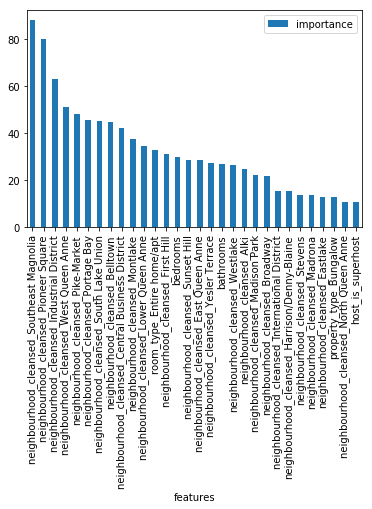

In [60]:
#Plotting the important features
plt.figure(figsize=(1000, 500))
coefficients.sort_values('importance',ascending=False)[:30].plot(x='features', y='importance', kind='bar')

In [61]:
#Getting the error on the test dataset to see how linear regression is performing on this dataset
from sklearn import metrics
Y_predict = lm.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

62.502561488720204

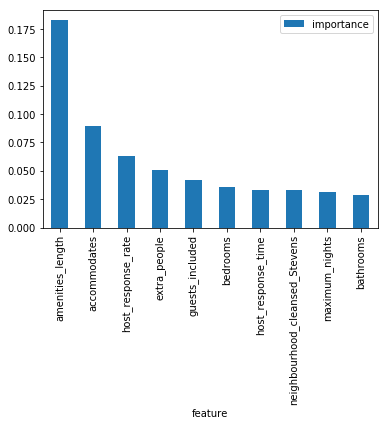

In [62]:
#Let us apply Decision Tree
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#Make the decision tree
decisiontree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01,)
decisiontree = decisiontree.fit(X_train,Y_train)

#Look at outputs
importances = decisiontree.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [63]:
#Let us test our decision tree regressor to see how it performs on our test dataset
Y_predict = decisiontree.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

93.67880775654443

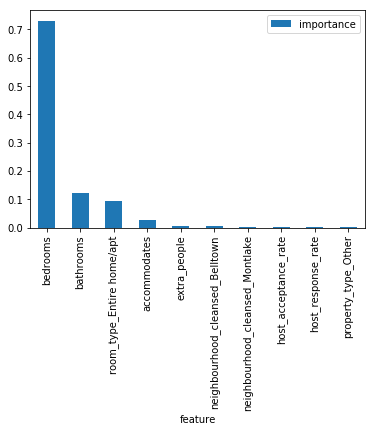

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=0)
rf.fit(X_train, Y_train)
rf_importances = rf.feature_importances_
rf_result = pd.DataFrame({'feature': feat_names, 'importance': rf_importances})
rf_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')

In [65]:
#Let us test our random forest regressor to see how it performs on our test dataset
Y_predict = rf.predict(X_test)
error = np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))
error

65.358511735741757

Since,the error of the linear regression is the minimum out of all the models above,we will use the results of linear regression to find out the features influencing the price of a listing.
Using the results of linear regression,we can see that the listings price depends on :
- neighborhood,size(number of bedrooms,number of bathrooms),
- type of the property i.e. if it is a bungalow,the price is higher than the other property and on
- whether the host is a superhost or not.

# Conclusion:

On the basis of my analysis,below are my findings:

- The prices of the listings are maximum from July to September and are minimum from January to March which is understood as July to September is the best time to visit Seattle because of the nice weather and therefore the prices are highest during that time because of the high demand.
- The average rating score of Arbor Heights is maximum followed by Riverview and Southeast Magnolia.The ratings of a listing is influenced by whether a host is a superhost or not,the host’s response rate,the size of the listings,the number of amenities provided in the listing and also on its price.
- Price of a listing depends on its neighborhood,size(number of bedrooms,number of bathrooms),type of the property i.e. if it is a bungalow,the price is higher than the other property and on whether the host is a superhost or not.